In [1]:
import numpy as np
from scipy.stats import norm

def BachelierCall(S0 ,sigma , K, T):
    return (S0-K)*norm.cdf((S0-K)/(S0*sigma*np.sqrt(T)))+S0*sigma*np.sqrt(T)*norm.pdf((S0-K)/(S0*sigma*np.sqrt(T)))

In [2]:
S0=100
sigma=0.4
T=2.0
r=0.05
K = S0 * np.exp(r*T)
F= S0 * np.exp(r*T)
BachelierCall(S0 , sigma, K, T)

17.697946413652

In [9]:
def BachelierPut(S0 ,sigma , K, T):
    return (K-S0)*norm.cdf((K-S0)/(S0*sigma*np.sqrt(T)))+S0*sigma*np.sqrt(T)*norm.pdf((K-S0)/(S0*sigma*np.sqrt(T)))

In [4]:
BachelierPut(S0 , sigma, K, T)

28.215038221216766

In [10]:
def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [6]:
BlackScholesCall(S0,K,r,sigma,T)

22.270258921047855

In [11]:
def BlackScholesPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

In [8]:
BlackScholesPut(S0,K,r,sigma,T)

22.270258921047848

In [7]:

def Black76Call(F, K, r, sigma, T):
    d1=(np.log(F/K)+0.5*sigma**2*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    D=np.exp(-r*T)
    return D*(F*norm.cdf(d1)-K*norm.cdf(d2))

In [14]:
Black76Call(F,K,r,sigma,T)

22.270258921047837

In [13]:
def Black76Put(F, K, r, sigma, T):
    d1=(np.log(F/K)+0.5*sigma**2*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    D=np.exp(-r*T)
    return D*(K*norm.cdf(-d2)-F*norm.cdf(-d1))

In [16]:
Black76Put(F, K, r, sigma, T)

22.270258921047848

In [9]:
def Black76Asset(F, K, r, sigma, T):
    d1=(np.log(F/K)+0.5*sigma**2*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    D=np.exp(-r*T)
    return D*F*norm.cdf(d1)

In [5]:
def DispalcedCall(F0,K,r,sigma,T,beta):
    F=F0/beta
    K=K+(1-beta)/beta*F0
    sigma=beta*sigma
    return Black76Call(F,K,r,sigma,T)

In [10]:
def DispalcedAsset(F0,K,r,sigma,T,beta):
    F=F0/beta
    K=K+(1-beta)/beta*F0
    sigma=beta*sigma
    return Black76Asset(F,K,r,sigma,T)

In [13]:
DispalcedAsset(F0=109,K=100,r=0.0183,sigma=0.1,T=5,beta=0.5)

132.78985142265336

In [8]:
beta=0.5
DispalcedCall(F,K,r,sigma,T,beta)

22.492583203656977

In [15]:
def DispalcedPut(F0,K,r,sigma,T,beta):
    F=F0/beta
    K=K+(1-beta)/beta*F0
    sigma=beta*sigma
    return Black76Put(F,K,r,sigma,T)

In [25]:
DispalcedCall(F,K,r,sigma,T,beta)

22.270258921047837

In [16]:
from scipy.optimize import brentq

def impliedCallVolatility(S, K, r, price, T):
    impliedVol = brentq(lambda x: price -
                        BlackScholesCall(S, K, r, x, T),
                        1e-9, 1)

    return impliedVol

def impliedPutVolatility(S, K, r, price, T):
    impliedVol = brentq(lambda x: price -
                        BlackScholesPut(S, K, r, x, T),
                        1e-9, 1)

    return impliedVol

In [2]:
import pandas as pd
google_c=pd.read_csv('goog_call.csv')
google_p=pd.read_csv('goog_put.csv')
rf=pd.read_csv('discount.csv')

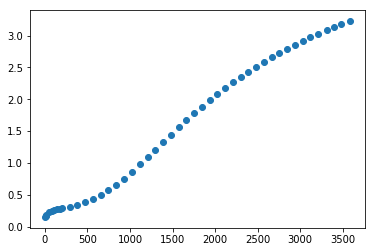

In [4]:

import matplotlib.pyplot as plt
plt.scatter(rf['Day'],rf['Rate (%)'])

In [31]:
pd.to_datetime(google_c['expiry'][0],format='%Y%m%d')-pd.to_datetime(google_c['date'][0],format='%Y%m%d')

Timedelta('505 days 00:00:00')

In [5]:
rate=rf['Rate (%)'][12]-rf['Rate (%)'][11]
day=rf['Day'][12]-rf['Day'][11]
rf_505=rate/day*(505-rf['Day'][11])+rf['Rate (%)'][11]

In [200]:
google_c.head()

,date,expiry,strike,best_bid,best_offer
0,20130830,20150117,320.0,525.3,528.8
1,20130830,20150117,340.0,505.8,509.2
2,20130830,20150117,350.0,496.0,499.2
3,20130830,20150117,360.0,486.3,489.4
4,20130830,20150117,370.0,476.5,479.7


In [20]:
s=846.9
T=505/365
r=rf_505/100
vol2=[]
for i,k in zip(google_c.index[google_c['strike']>s],google_c['strike'][google_c['strike']>s]):
    price=(google_c['best_bid'][i]+google_c['best_offer'][i])/2
    vol2.append(impliedCallVolatility(s,k,r,price,T)) 

In [21]:
s=846.9
T=505/365
r=rf_505/100
vol1=[]
for i,k in enumerate(google_p['strike'][google_p['strike']<s]):
    price=(google_p['best_bid'][i]+google_p['best_offer'][i])/2
    vol1.append(impliedPutVolatility(s,k,r,price,T))

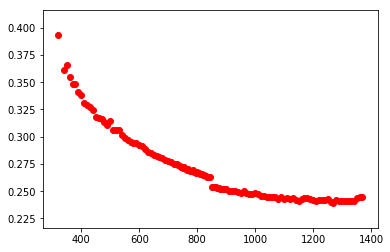

In [26]:
vol=vol1+vol2
plt.scatter(google_c['strike'],vol,c='r')

In [39]:
K_vol=pd.DataFrame(google_c['strike'])
K_vol['vol']=vol
K_vol.to_csv('K_vol.csv')

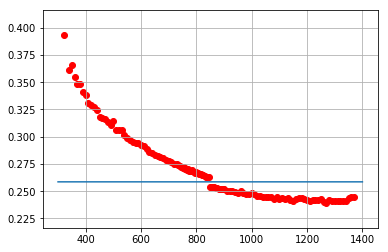

In [24]:
sigma=(vol1[-1]+vol2[0])/2
strike=np.linspace(300,1400,1100)
imvol_list_1=[]
beta=1
s=846.9
T=505/365
r=rf_505/100
F0=s*np.exp(r*T)
for i in strike:
    price=DispalcedCall(F0,i,r,sigma,T,beta)
    imvol_list_1.append(impliedCallVolatility(s, i, r, price, T))
plt.grid()
plt.scatter(google_c['strike'],vol,c='r')
plt.plot(strike,imvol_list_1)

In [25]:
sigma

0.25860610287551256

In [28]:
strike=np.linspace(300,1400,1100)
beta_list=np.linspace(0.2,1,5)
s=846.9
T=505/365
r=rf_505/100
F0=s*np.exp(r*T)
imvol_list=[]
for beta in beta_list:
    imvol=[]
    for i in strike:
        price=DispalcedCall(F0,i,r,sigma,T,beta)
        imvol.append(impliedCallVolatility(s, i, r, price, T))
    imvol_list.append(imvol)


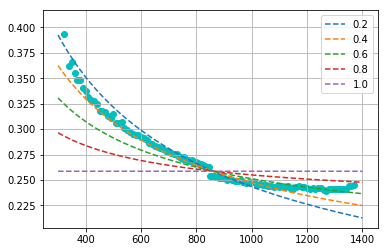

In [29]:
imvol_beta=pd.DataFrame(np.transpose(imvol_list),columns=['0.2','0.4','0.6','0.8','1.0'])
plt.grid()
plt.scatter(google_c['strike'],vol,c='c')
for i in imvol_beta.columns:
    plt.plot(strike,imvol_beta[i],'--',label=i)
plt.legend()


In [31]:
from scipy.optimize import least_squares
s=846.9
T=505/365
r=rf_505/100
F0=s*np.exp(r*T)
sigma=(vol1[-1]+vol2[0])/2
def disp_cali(x,s,F0,K,r,sigma,T,vol):
    err=0.0
    for i,v in enumerate(vol):
        price=DispalcedCall(F0,K[i],r,sigma,T,x)
        imvol=impliedCallVolatility(s, K[i], r, price, T)
        err+=(v-imvol)**2
    return err

initialBeta = 0.8
res1 = least_squares(lambda x: disp_cali(x,s,F0,K_vol['strike'].values,r,sigma,T,vol),initialBeta)


#plt.grid()
#plt.scatter(google_c['strike'],vol,c='r')
#plt.plot(strike,imvol_list_1)

In [32]:
res1

 active_mask: array([0.])
        cost: 1.7953971820830785e-05
         fun: array([0.00599232])
        grad: array([8.87379911e-09])
         jac: array([[1.4808611e-06]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 19
        njev: 13
  optimality: 8.873799112781075e-09
      status: 1
     success: True
           x: array([0.36816832])

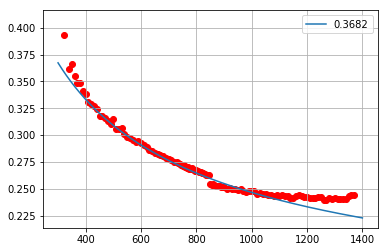

In [33]:
sigma=(vol1[-1]+vol2[0])/2
strike=np.linspace(300,1400,1100)
imvol_list_1=[]
beta=res1.x[0]
s=846.9
T=505/365
r=rf_505/100
F0=s*np.exp(r*T)
for i in strike:
    price=DispalcedCall(F0,i,r,sigma,T,beta)
    imvol_list_1.append(impliedCallVolatility(s, i, r, price, T))
plt.grid()
plt.scatter(google_c['strike'],vol,c='r')
plt.plot(strike,imvol_list_1,label=round(beta,4))
plt.legend()

In [34]:
def SABR(F, K, T, alpha, beta, rho, nu):
    X = K
    if F == K:
        numer1 = (((1 - beta)**2)/24)*alpha*alpha/(F**(2 - 2*beta))
        numer2 = 0.25*rho*beta*nu*alpha/(F**(1 - beta))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        VolAtm = alpha*(1 + (numer1 + numer2 + numer3)*T)/(F**(1-beta))
        sabrsigma = VolAtm
    else:
        z = (nu/alpha)*((F*X)**(0.5*(1-beta)))*np.log(F/X)
        zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
        numer1 = (((1 - beta)**2)/24)*((alpha*alpha)/((F*X)**(1 - beta)))
        numer2 = 0.25*rho*beta*nu*alpha/((F*X)**((1 - beta)/2))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        numer = alpha*(1 + (numer1 + numer2 + numer3)*T)*z
        denom1 = ((1 - beta)**2/24)*(np.log(F/X))**2
        denom2 = (((1 - beta)**4)/1920)*((np.log(F/X))**4)
        denom = ((F*X)**((1 - beta)/2))*(1 + denom1 + denom2)*zhi
        sabrsigma = numer/denom

    return sabrsigma

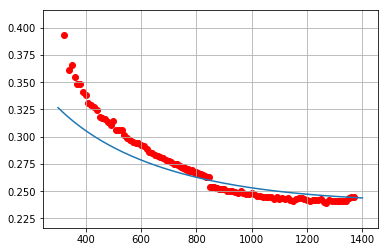

In [35]:
strike=np.linspace(300,1400,1100)
sabr_list=[]
beta=0.8
alpha=1.0
rho=-0.2
nu=0.2
s=846.9
T=505/365
r=rf_505/100
F0=s*np.exp(r*T)
for i in strike:
    sabr_list.append(SABR(F0 , i, T, alpha, beta, rho, nu))
plt.grid()
plt.scatter(google_c['strike'],vol1+vol2,c='r')
plt.plot(strike,sabr_list)

In [36]:
from scipy.optimize import least_squares

s=846.9
T=505/365
r=rf_505/100
F0=s*np.exp(r*T)

def sabrcalibration(x, strikes, vols, F, T):
    err = 0.0
    for i, vol in enumerate(vols):
        err += (vol - SABR(F, strikes[i], T,
                           x[0], 0.8, x[1], x[2]))**2

    return err


initialGuess = [0.02, 0.2, 0.1]
res = least_squares(lambda x: sabrcalibration(x,
                                              K_vol['strike'].values,
                                              K_vol['vol'].values,
                                              F0,
                                              T),
                    initialGuess)
alpha = res.x[0]
rho = res.x[1]
nu = res.x[2]


In [37]:
res

 active_mask: array([0., 0., 0.])
        cost: 1.1934245247873596e-06
         fun: array([0.00154494])
        grad: array([2.41345009e-08, 2.72965999e-08, 2.50571348e-08])
         jac: array([[1.56216120e-05, 1.76683534e-05, 1.62188080e-05]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 300
        njev: 296
  optimality: 2.729659990533516e-08
      status: 0
     success: False
           x: array([ 0.99016842, -0.2838585 ,  0.35351559])

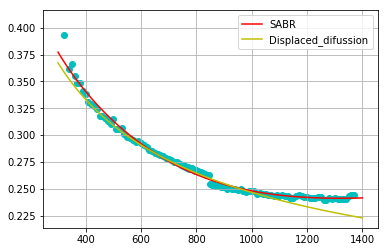

In [234]:
strike=np.linspace(300,1400,1100)
sabr_list=[]
beta=0.8
alpha = res.x[0]
rho = res.x[1]
nu = res.x[2]
s=846.9
T=505/365
r=rf_505/100
F0=s*np.exp(r*T)
for i in strike:
    sabr_list.append(SABR(F0 , i, T, alpha, beta, rho, nu))
plt.grid()
plt.scatter(google_c['strike'],vol1+vol2,c='c')
plt.plot(strike,sabr_list,'r',label='SABR')
plt.plot(strike,imvol_list_1,'y',label='Displaced_difussion')
plt.legend()